### Road Traffic Analysis in Calderdale, England
Link to Source \
https://data.world/datagov-uk/053a6529-6c8c-42ac-ae1e-455b2708e535

### Data Science Process
1) Define Problem
2) Prepare the Data
3) Creating the Model
4) Test the Model
5) Validate the Model
6) Evaluate the Model
7) Deploy the Model

**Context:** We have data for road accidents that occured between 2014 to 2016 in Calderdale, England. \
**Define Problem:** The analysis will focus on identifying the casualty severity.

### Preparing the Data

In [175]:
# Import libraries
import pandas as pd
import geopandas as gpd    # make sure to 'pip install geopandas'.
# geopandas will be used to read the 2017 dataset

# Import the files
df14 = pd.read_csv("accident-2014-4.csv")   # 2014
df15 = pd.read_csv("accident-2015-6.csv")   # 2015
df16 = pd.read_csv("accident-2016-8.csv")   # 2016
df17 = pd.DataFrame(gpd.read_file("accident-2017-1.geojson"))   # 2017


In [176]:
df14.columns

Index(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class',
       '1st Road Class & No', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Local Authority', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty',
       'Vehicle Number', 'Type of Vehicle'],
      dtype='object')

In [177]:
# Check that all datasets have the same columns and that they are aligned
datasets= {'2014':df14,'2015':df15,'2016':df16,'2017':df17}

for key in datasets:
    if list(datasets[key].columns) == list(df14.columns):
        print(f'The {key} data passes the check.')
    else:
        print(f'The {key} data needs to be checked.')

The 2014 data passes the check.
The 2015 data passes the check.
The 2016 data passes the check.
The 2017 data needs to be checked.


In [178]:
# Combine the 2014 to 2016 datasets.
df = pd.concat([df14,df15,df16], axis=0, ignore_index=True)
df.head()

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Vehicle Number,Type of Vehicle
0,11S0281,407491,428929,1,28/01/2014,835,6,U,2,1,9,Calderdale,3,3,2,8,1,9
1,11S1147,412912,429039,1,28/01/2014,1745,6,U,2,4,1,Calderdale,3,3,2,15,1,9
2,11S1147,412912,429039,1,28/01/2014,1745,6,U,2,4,1,Calderdale,3,3,1,17,1,9
3,11U0285,407179,424776,2,30/01/2014,900,6,U,2,1,8,Calderdale,1,3,2,29,2,9
4,11U0285,407179,424776,2,30/01/2014,900,6,U,2,1,8,Calderdale,2,3,1,9,2,9


In [179]:
# Check the columns of df and df17.
existingCol = []
missingCol = []
for c in df.columns:
    if c in df17.columns:
        existingCol.append(c)
    else:
        missingCol.append(c)
print(existingCol)  # The common existing columns compared to columns in df.
print(missingCol)   # The missing columns in df17 compared to  columns in df.
        


['Reference Number', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'Type of Vehicle']
['Grid Ref: Easting', 'Grid Ref: Northing', '1st Road Class', 'Local Authority', 'Vehicle Number']


From the above regarding the 2017 data, df17, we can see that:
1) 'Grid Ref: Easting' is called 'Easting' --> make naming consistent [complete]
2) 'Grid Ref: Northing' is called 'Northing' --> make naming consistent [complete]
3) '1st Road Class' is missing --> values can be generated using '1st Road Class & No' [complete]
4) 'Local Authority' is missing --> can potentially drop from our analysis [complete]
5) 'Vehicle Number' is missing --> can potentially drop from our analysis [complete]
6) 'geometry' is only part of df17 --> remove from df17 [complete]

**Apply these changes.**

In [180]:
# Apply above changes.
# Change 1 and 2 will be applied on df. It's a much more simplier column name
df.rename(columns= {'Grid Ref: Easting':'Easting','Grid Ref: Northing':'Northing'}, inplace=True)
df.head(3)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Local Authority,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Vehicle Number,Type of Vehicle
0,11S0281,407491,428929,1,28/01/2014,835,6,U,2,1,9,Calderdale,3,3,2,8,1,9
1,11S1147,412912,429039,1,28/01/2014,1745,6,U,2,4,1,Calderdale,3,3,2,15,1,9
2,11S1147,412912,429039,1,28/01/2014,1745,6,U,2,4,1,Calderdale,3,3,1,17,1,9


In [181]:
# Change 3
df17['1st Road Class'] = df17['1st Road Class & No'].apply(lambda x: x[0])
df17['1st Road Class'].unique()

array(['U', 'A', 'B', 'M'], dtype=object)

In [182]:
# Change 4
df['Local Authority'].unique()  # Only one unique entry. Removed the column.
df = df.drop(columns=['Local Authority'])

In [183]:
# Change 5
df['Vehicle Number'].unique()   # values from 1 to 7. No unique license. Removed the column.
df = df.drop(columns=['Vehicle Number'])

In [184]:
# Change 6
df17.drop(columns=['geometry'],inplace=True)
df17.head(1)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,1st Road Class
0,4111856,411259,429331,2,01/01/2017,2120,U,Wet/Damp,Darkness: street lights present and lit,Raining without high winds,Car,Vehicle or pillion passenger,Serious,Female,16,U


In [185]:
df.head(1)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,11S0281,407491,428929,1,28/01/2014,835,6,U,2,1,9,3,3,2,8,9


In [186]:
# Combine all the data sources
sorted(df.columns) == sorted(df17.columns)
data = pd.concat([df,df17], ignore_index=True)
data.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,11S0281,407491,428929,1,28/01/2014,835,6,U,2,1,9,3,3,2,8,9
1,11S1147,412912,429039,1,28/01/2014,1745,6,U,2,4,1,3,3,2,15,9
2,11S1147,412912,429039,1,28/01/2014,1745,6,U,2,4,1,3,3,1,17,9
3,11U0285,407179,424776,2,30/01/2014,900,6,U,2,1,8,1,3,2,29,9
4,11U0285,407179,424776,2,30/01/2014,900,6,U,2,1,8,2,3,1,9,9


In [187]:
data.info() # No null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Reference Number     2070 non-null   object
 1   Easting              2070 non-null   object
 2   Northing             2070 non-null   object
 3   Number of Vehicles   2070 non-null   object
 4   Accident Date        2070 non-null   object
 5   Time (24hr)          2070 non-null   object
 6   1st Road Class       2070 non-null   object
 7   1st Road Class & No  2070 non-null   object
 8   Road Surface         2070 non-null   object
 9   Lighting Conditions  2070 non-null   object
 10  Weather Conditions   2070 non-null   object
 11  Casualty Class       2070 non-null   object
 12  Casualty Severity    2070 non-null   object
 13  Sex of Casualty      2070 non-null   object
 14  Age of Casualty      2070 non-null   object
 15  Type of Vehicle      2070 non-null   object
dtypes: obj

In [188]:
# Reference number can be repeated as it indicates the accident.
# It could be possible that multiple casualites in the same accident shared attributes.

**Other features we can create from existing features:**
1) from 'Accident Date':
    - Month
    - day of the week
    - day of the month
2) from Time 'Time (24hr)':
    - by the hour

**Replacements to be done:**
1) change values of 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty'
   to a be easier to read.
    - replacing of values with similar name.

2) change 'Type of Vehicle'
    -  replacing of values with similar name.

### Data Processing
**Data types, Labels, and New Features**

In [189]:

{
    1: "M",
    2: "A(M)",
    3: "A",
    4: "B",
    5: "C",
    6: "U"
}

{1: 'M', 2: 'A(M)', 3: 'A', 4: 'B', 5: 'C', 6: 'U'}

In [190]:
type(data.loc[0,'Accident Date'])

str

In [191]:
# Convert string values from 'Accident Date' to datetime
from datetime import datetime
data['Accident Date'] = data['Accident Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [192]:
# Create a new column for day of the week
data['Day of the Week'] = data['Accident Date'].apply(lambda x: x.strftime('%A'))

In [193]:
# Create new column for day of the month
data['Day of the Month'] = data['Accident Date'].apply(lambda x: x.day)

In [194]:
# Create a new column for month of the year
data['Month'] = data['Accident Date'].apply(lambda x: x.month)

In [195]:
data['Hour'] = data['Time (24hr)'].apply(lambda x: int(x)//100) # string existed in 'Time (24hr)'

In [196]:
data.columns

Index(['Reference Number', 'Easting', 'Northing', 'Number of Vehicles',
       'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No',
       'Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Casualty Class', 'Casualty Severity', 'Sex of Casualty',
       'Age of Casualty', 'Type of Vehicle', 'Day of the Week',
       'Day of the Month', 'Month', 'Hour'],
      dtype='object')

In [197]:
# Ensure that that columns which have numbers are integers.
draftCheck = ['Easting', 'Northing', 'Number of Vehicles', 'Time (24hr)', 'Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Casualty Class', 'Casualty Severity', 'Sex of Casualty',
       'Age of Casualty']

check = ['Easting', 'Northing', 'Number of Vehicles', 'Time (24hr)','Age of Casualty']     # Change to integers. Some had string values

data['Number of Vehicles'].unique()

data[check] = data[check].applymap(lambda x: int(x))
# data.head()


In [198]:
data['1st Road Class'].unique()

array([6, 3, 1, 4, 2, 'U', 'A', 'B', 'M'], dtype=object)

In [199]:
# Apply mapping to change values
road_class_map = {
    1: "M",
    2: "A(M)",
    3: "A",
    4: "B",
    5: "C",
    6: "U"
}
data['1st Road Class'].replace(road_class_map,inplace=True)


road_surface_map = {
    1: "Dry",
    2: "Wet/Damp",
    3: "Snow",
    4: "Frost/Ice",
    5: "Flood"
}
data['Road Surface'].replace(road_surface_map,inplace=True)

lighting_map = {
    1: "Daylight - SL",
    2: "Daylight - No SL",
    3: "Daylight - SL/UNK",
    4: "Darkness - SL Lit",
    5: "Darkness - SL Unlit",
    6: "Darkness - No SL",
    7: "Darkness - SL/UNK"
}
data['Lighting Conditions'].replace(lighting_map,inplace=True)

weather_map = {
    1: "Fine - No Wind",
    2: "Rain - No Wind",
    3: "Snow - No Wind",
    4: "Fine & Wind",
    5: "Rain & Wind",
    6: "Snow & Wind",
    7: "Fog or Mist",
    8: "Other",
    9: "Unknown"
}
data['Weather Conditions'].replace(weather_map,inplace=True)

casualty_class_map = {
    1: "Driver/Rider",
    2: "Vehicle/Passenger",
    3: "Pedestrian"
}
data['Casualty Class'].replace(casualty_class_map, inplace=True)

causalty_severity_map = {
    1: "Fatal",
    2: "Serious",
    3: "Slight"
}
data['Casualty Severity'].replace(causalty_severity_map, inplace=True)

gender_map = {
    1: "Male",
    2: "Female"
}
data['Sex of Casualty'].replace(gender_map, inplace=True)

vehicle_map = {
    1: "Pedal Cycle",
    2: "Motorcycle < 50CC",
    3: "Motorcycle: 50CC-125CC",
    4: "Motorcycle: 125CC-500CC",
    5: "Motorcycle > 500CC",
    8: "Taxi/Private Car",
    9: "Car",
    10: "Minibus",
    11: "Bus or Coach",
    14: "Other Motor Vehicle",
    15: "Other Non-motor Vehicle",
    16: "Ridden Horse",
    17: "Agricultural Vehicle",
    18: "Tram/Light Rail",
    19: "Small Goods Vehicle",
    20: "Medium Goods Vehicle",
    21: "Large Goods Vehicle",
    22: "Mobility Scooter",
    23: "Unknown", # Error message says there's a vehicle type 23 but no 23 in dataset dictionary
    90: "Other Vehicle",
    97: "Motorcycle: UNK CC",
}
data['Type of Vehicle'].replace(vehicle_map, inplace=True)

In [200]:
# Different labels with the same meaning.
# Change it labels are consistent.

In [201]:
data['Casualty Class'].unique()

array(['Pedestrian', 'Driver/Rider', 'Vehicle/Passenger',
       'Vehicle or pillion passenger', 'Driver or rider'], dtype=object)

In [202]:
data['Casualty Class'].replace(
    {'Driver or rider':'Driver/Rider',
     'Vehicle or pillion passenger':'Vehicle/Passenger'
     },inplace=True)

In [203]:
data['Lighting Conditions'].unique()

array(['Daylight - SL', 'Darkness - SL Lit', 'Darkness - No SL',
       'Darkness - SL/UNK', 'Darkness - SL Unlit',
       'Darkness: street lights present and lit',
       'Daylight:street lights present',
       'Darkness: street lights present but unlit',
       'Darkness: street lighting unknown',
       'Darkness: no street lighting'], dtype=object)

In [204]:
data['Lighting Conditions'].replace(
    {'Darkness: street lights present and lit': 'Darkness - SL Lit',
     'Daylight:street lights present':'Daylight - SL',
     'Darkness: street lights present but unlit':'Darkness - SL Unlit',
     'Darkness: street lighting unknown':'Darkness - SL/UNK',
     'Darkness: no street lighting':'Darkness - No SL'
     },inplace=True)

In [205]:
data['Weather Conditions'].unique()

array(['Unknown', 'Fine - No Wind', 'Other', 'Rain - No Wind',
       'Fine & Wind', 'Snow - No Wind', 'Rain & Wind', 'Fog or Mist',
       'Snow & Wind', 'Raining without high winds',
       'Fine without high winds', 'Raining with high winds',
       'Fog or mist - if hazard', 'Snowing without high winds',
       'Snowing with high winds', 'Fine with high winds'], dtype=object)

In [206]:
data['Weather Conditions'].replace(
    {'Raining without high winds':'Rain & Wind',
     'Fine without high winds':'Fine & Wind',
     'Fog or Mist':'Fog or mist - if hazard',
     'Snowing without high winds':'Snow & Wind'},inplace=True)

In [207]:
data['Type of Vehicle'].unique()

array(['Car', 'Small Goods Vehicle', 'Taxi/Private Car', 'Pedal Cycle',
       'Bus or Coach', 'Motorcycle > 500CC', 'Motorcycle: 50CC-125CC',
       'Motorcycle < 50CC', 'Medium Goods Vehicle', 'Other Vehicle',
       'Large Goods Vehicle', 'Motorcycle: 125CC-500CC',
       'Agricultural Vehicle', 'Tram/Light Rail', 'Minibus',
       'Ridden Horse', 'Unknown', 'Mobility Scooter',
       'Motorcycle over 125cc and up to 500cc',
       'Goods vehicle 3.5 tonnes mgw and under', 'Taxi/Private hire car',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'M/cycle 50cc and under', 'Minibus (8 � 16 passenger seats)',
       'Motorcycle over 500cc',
       'Bus or coach (17 or more passenger seats)', 'Pedal cycle',
       'Goods vehicle 7.5 tonnes mgw and over', 'Motorcycle - Unknown CC'],
      dtype=object)

In [208]:
# Generalizing Type of Vehicle
data['Type of Vehicle'].replace(
    {'Taxi/Private hire car':'Car',
     'Taxi/Private Car':'Car',
     'Pedal cycle':'Pedal Cycle',
     'Bus or coach (17 or more passenger seats)':'Bus or Coach',
     'Motorcycle > 500CC':'Motorcycle',
     'Motorcycle: 50CC-125CC':'Motorcycle',
     'Motorcycle < 50CC':'Motorcycle',
     'Motorcycle: 125CC-500CC':'Motorcycle',
     'Motorcycle over 125cc and up to 500cc':'Motorcycle',
     'Motorcycle - Unknown CC':'Motorcycle',
     'Motorcycle over 50cc and up to 125cc':'Motorcycle',
     'Motorcycle over 500cc':'Motorcycle','M/cycle 50cc and under':'Motorcycle',
     'Unknown':'Other Vehicle',
     'Minibus (8 � 16 passenger seats)':'Minibus',
     'Goods vehicle 3.5 tonnes mgw and under':'Small Goods Vehicle',
     'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw':'Medium Goods Vehicle',
     'Goods vehicle 7.5 tonnes mgw and over':'Large Goods Vehicle'},inplace=True)

### Choosing Input Variables
**For the analysis, I will be creating models based on the following combination of input variables:**

- Who was involved in the accident?
    - Casualty Class
    - Sex of Casualty
    - Age of Casualty --> Age Group

- What was involved in the accident?
    - Number of Vehicles
    - Road Surface
    - Lighting Condition
    - Weather Conditions
    - Type of Vehicle
- When was the accident?
    - Day of the Week
    - Day of the Month
    - Month
    - Hour
- Where was the accident?
    - Easting
    - Northing
    - 1st Road Class

In [209]:
data.head(3)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Day of the Week,Day of the Month,Month,Hour
0,11S0281,407491,428929,1,2014-01-28,835,U,U,Wet/Damp,Daylight - SL,Unknown,Pedestrian,Slight,Female,8,Car,Tuesday,28,1,8
1,11S1147,412912,429039,1,2014-01-28,1745,U,U,Wet/Damp,Darkness - SL Lit,Fine - No Wind,Pedestrian,Slight,Female,15,Car,Tuesday,28,1,17
2,11S1147,412912,429039,1,2014-01-28,1745,U,U,Wet/Damp,Darkness - SL Lit,Fine - No Wind,Pedestrian,Slight,Male,17,Car,Tuesday,28,1,17


In [210]:
data.shape

(2070, 20)

### Who?
- Casualty Class
- Sex of Casualty
- Age of Casualty --> Age Group

In [211]:
# Let's create a bin to group the age of casualty.
# You can start driving a car in the UK when you're 17 years old.
bins = [0,17,26,36,51,61,71,9999]
bin_labels = ["0-16","17-25","26-35","36-50","51-60","61-70",">70"]
data["Age Group"] = pd.cut(data["Age of Casualty"], bins, right=False, labels=bin_labels)
data.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Day of the Week,Day of the Month,Month,Hour,Age Group
0,11S0281,407491,428929,1,2014-01-28,835,U,U,Wet/Damp,Daylight - SL,...,Pedestrian,Slight,Female,8,Car,Tuesday,28,1,8,0-16
1,11S1147,412912,429039,1,2014-01-28,1745,U,U,Wet/Damp,Darkness - SL Lit,...,Pedestrian,Slight,Female,15,Car,Tuesday,28,1,17,0-16
2,11S1147,412912,429039,1,2014-01-28,1745,U,U,Wet/Damp,Darkness - SL Lit,...,Pedestrian,Slight,Male,17,Car,Tuesday,28,1,17,17-25
3,11U0285,407179,424776,2,2014-01-30,900,U,U,Wet/Damp,Daylight - SL,...,Driver/Rider,Slight,Female,29,Car,Thursday,30,1,9,26-35
4,11U0285,407179,424776,2,2014-01-30,900,U,U,Wet/Damp,Daylight - SL,...,Vehicle/Passenger,Slight,Male,9,Car,Thursday,30,1,9,0-16


In [212]:
who = ['Casualty Class','Sex of Casualty','Age Group']

### What
- What was involved in the accident?
    - Number of Vehicles
    - Road Surface
    - Lighting Condition
    - Weather Conditions
    - Type of Vehicle

In [213]:
what = ['Number of Vehicles','Road Surface','Lighting Conditions','Weather Conditions','Type of Vehicle']

### When
- When was the accident?
    - Day of the Week
    - Day of the Month
    - Month
    - Hour

In [214]:
when = ['Day of the Week','Day of the Month','Month','Hour']

### Where
- Where was the accident?
    - Easting
    - Northing
    - 1st Road Class

In [215]:
# Easting and Northing are specifc. Might influence how well the model generalizes predictions.
where = ['Easting','Northing','1st Road Class']

In [216]:
# Out Variable labels. Easier to identify
causalty_severity_map = {
    'Fatal':1,
    'Serious':2,
    'Slight':3
}
data['Casualty Severity'].replace(causalty_severity_map,inplace=True)

In [217]:
# Preprocess and encode the categorical data
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Casualty Class','Sex of Casualty','Age Group','Road Surface','Lighting Conditions','Weather Conditions','Type of Vehicle','Day of the Week','1st Road Class']

In [218]:
# Function to apply LabelEncoder to multiple columns
def label_encode_columns(df, cols):
    label_encoder = LabelEncoder()
    for col in cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

# Apply label encoding to specified columns
encoded = label_encode_columns(data.copy(), columns_to_encode)
encoded.head()

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Day of the Week,Day of the Month,Month,Hour,Age Group
0,11S0281,407491,428929,1,2014-01-28,835,4,U,4,4,...,1,3,0,8,2,5,28,1,8,0
1,11S1147,412912,429039,1,2014-01-28,1745,4,U,4,1,...,1,3,0,15,2,5,28,1,17,0
2,11S1147,412912,429039,1,2014-01-28,1745,4,U,4,1,...,1,3,1,17,2,5,28,1,17,1
3,11U0285,407179,424776,2,2014-01-30,900,4,U,4,4,...,0,3,0,29,2,4,30,1,9,2
4,11U0285,407179,424776,2,2014-01-30,900,4,U,4,4,...,2,3,1,9,2,4,30,1,9,0


In [219]:
features = who + what + when + where + ['Casualty Severity']
final_data = encoded[features]
final_data.head()

,Casualty Class,Sex of Casualty,Age Group,Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Day of the Week,Day of the Month,Month,Hour,Easting,Northing,1st Road Class,Casualty Severity
0,1,0,0,1,4,4,11,2,5,28,1,8,407491,428929,4,3
1,1,0,0,1,4,1,1,2,5,28,1,17,412912,429039,4,3
2,1,1,1,1,4,1,1,2,5,28,1,17,412912,429039,4,3
3,0,0,2,2,4,4,4,2,4,30,1,9,407179,424776,4,3
4,2,1,0,2,4,4,4,2,4,30,1,9,407179,424776,4,3


In [220]:
final_data.to_excel('final_data.xlsx',index=False)

In [221]:
final_data.columns

Index(['Casualty Class', 'Sex of Casualty', 'Age Group', 'Number of Vehicles',
       'Road Surface', 'Lighting Conditions', 'Weather Conditions',
       'Type of Vehicle', 'Day of the Week', 'Day of the Month', 'Month',
       'Hour', 'Easting', 'Northing', '1st Road Class', 'Casualty Severity'],
      dtype='object')

In [ ]:
from pyproj import Proj, transform

# Define the coordinate systems
bng = Proj(init='epsg:27700')  # British National Grid EPSG code
wgs84 = Proj(init='epsg:4326')  # WGS84 EPSG code for latitude/longitude

# Example northing (Y) and easting (X) coordinates in BNG
northing = final_data['Northing']
easting = final_data['Easting']

# Convert BNG to latitude and longitude (WGS84)
longitude, latitude = transform(bng, wgs84, easting, northing)

print(latitude)
print(final_data['Northing'])

### Create the Model

In [223]:
# Accuracy scores to append.
characteristics = {'Who':who,
          'What':what,
          'When':when,
          'Where':where}

graphingData = pd.DataFrame(
    data = {
        'Who':[0,0],
        'What':[0,0],
        'When':[0,0],
        'Where':[0,0]
    },
    index= ['KNN','Random Forest']
)

# Import Libraries to build models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

counting = 0

for i in characteristics:
    scaler = MinMaxScaler()
    X = final_data[characteristics[i]].values.reshape(-1,len(characteristics[i]))
    y = final_data['Casualty Severity']

    # Create train and testing datasets
    X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)

    # Create the KNN model
    knn = KNeighborsClassifier()
    # Train the KNN model
    knn.fit(X_train,y_train)
    # Append the accuracy score
    graphingData.iloc[0,counting] = knn.score(X_test,y_test)

    # Create the Random Forest Model
    randomForest = RandomForestClassifier()
    # Train the Random Forest Classifier
    randomForest.fit(X_train,y_train)
    # Append the accuarcy score
    graphingData.iloc[1,counting] = randomForest.score(X_test,y_test)
    counting += 1

In [224]:
graphingData

,Who,What,When,Where
KNN,0.830918,0.842995,0.831522,0.822464
Random Forest,0.818237,0.831522,0.826691,0.814010


### Plot the Results

In [225]:
graphingData = graphingData.T.reset_index()
graphingData

,index,KNN,Random Forest
0,Who,0.830918,0.818237
1,What,0.842995,0.831522
2,When,0.831522,0.826691
3,Where,0.822464,0.814010


In [226]:
graphingData.rename(columns={"index":"Characteristic"},inplace=True)
graphingData

,Characteristic,KNN,Random Forest
0,Who,0.830918,0.818237
1,What,0.842995,0.831522
2,When,0.831522,0.826691
3,Where,0.822464,0.814010


In [227]:

# melt function is used to create three columns - id_vars, var_name, value_name.
# the last two columns unpivot the dataframe that is being used and organizes rows based on id_vars.

graphing_melted = graphingData.melt(id_vars='Characteristic',var_name='Model Type',value_name='Accuracy')

# x = 'Characteristic' y = 'Accuracy' and the colour code or hue = 'Model Type'
graphing_melted

,Characteristic,Model Type,Accuracy
0,Who,KNN,0.830918
1,What,KNN,0.842995
2,When,KNN,0.831522
3,Where,KNN,0.822464
4,Who,Random Forest,0.818237
5,What,Random Forest,0.831522
6,When,Random Forest,0.826691
7,Where,Random Forest,0.814010


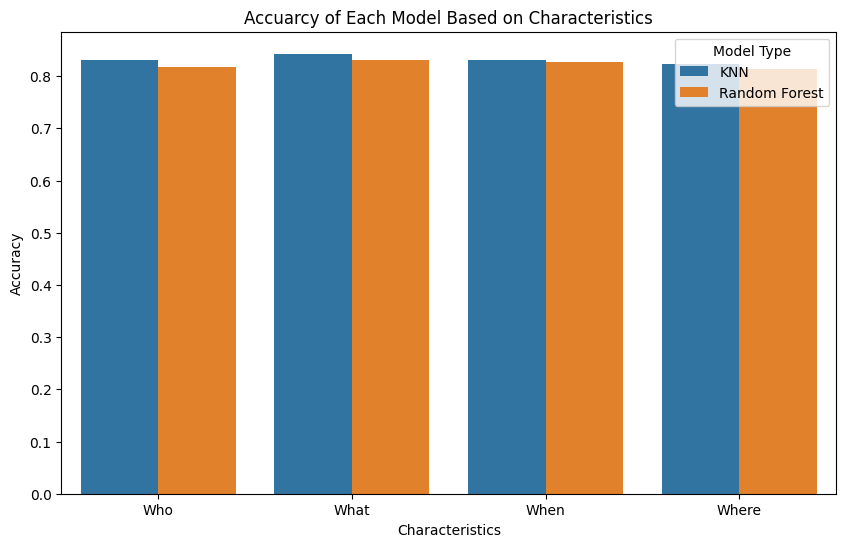

In [228]:
# Plot the graphs
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x='Characteristic', y='Accuracy', hue='Model Type', data=graphing_melted)

plt.title('Accuarcy of Each Model Based on Characteristics')
plt.xlabel('Characteristics')
plt.ylabel('Accuracy')
plt.legend(title='Model Type',loc='upper right')
plt.show()

### Create Models Using All Characteristics

In [229]:
X = final_data.drop(columns=['Casualty Severity'])
y = final_data['Casualty Severity']

# Create train and testing datasets
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=200)
# Train the KNN model
knn.fit(X_train,y_train)
all_acc_knn = knn.score(X_test,y_test)
all_acc_knn

0.841183574879227

In [230]:
X = final_data.drop(columns=['Casualty Severity'])
y = final_data['Casualty Severity']

# Create train and testing datasets
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
all_acc_rfc = model.score(X_test,y_test)
all_acc_rfc

0.8429951690821256

In [231]:
df_knn = pd.DataFrame({'Characteristic':['All'], 'Model Type':['KNN'], 'Accuracy':[all_acc_knn]})
df_rcf = pd.DataFrame({'Characteristic':['All'], 'Model Type':['Random Forest'], 'Accuracy':[all_acc_rfc]})
final = pd.concat([df_knn,df_rcf,graphing_melted])
final

,Characteristic,Model Type,Accuracy
0,All,KNN,0.841184
0,All,Random Forest,0.842995
0,Who,KNN,0.830918
1,What,KNN,0.842995
2,When,KNN,0.831522
3,Where,KNN,0.822464
4,Who,Random Forest,0.818237
5,What,Random Forest,0.831522
6,When,Random Forest,0.826691
7,Where,Random Forest,0.814010


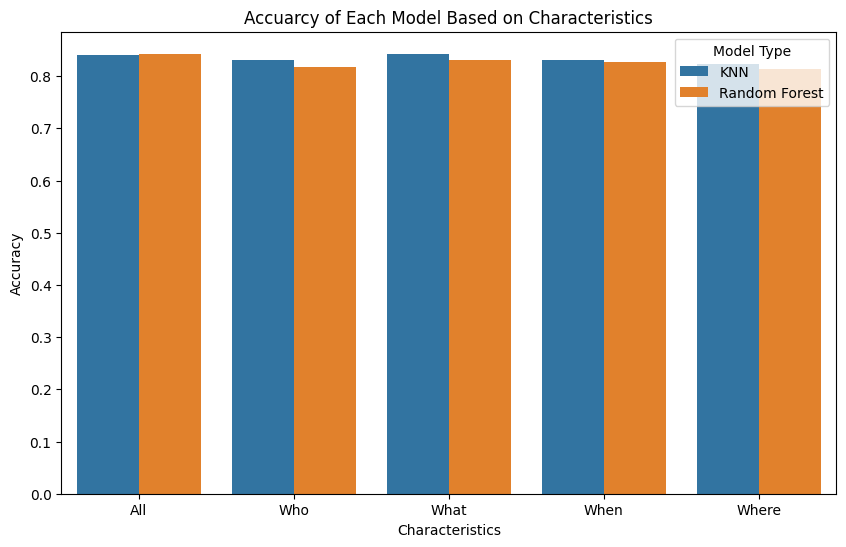

In [232]:
# Plot the graphs
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x='Characteristic', y='Accuracy', hue='Model Type', data=final)

plt.title('Accuarcy of Each Model Based on Characteristics')
plt.xlabel('Characteristics')
plt.ylabel('Accuracy')
plt.legend(title='Model Type',loc='upper right')
plt.show()